In [ ]:
# f(x)= x^4+ 4 x^3− 79 x^2− 226 x + 720
# x^∗=argmin_x  f(x)= ??

In [77]:
import numpy as np
import matplotlib.pyplot as pl

def f(x):
    y= x**4+ 4* x**3- 79 *x**2- 226 *x + 720
    return y
x= np.linspace(-10,10,1001) #100001)
y= f(x)
y

array([1080.        , 1051.24011216, 1022.79929856, ..., 4425.26278656,
       4492.37604816, 4560.        ])

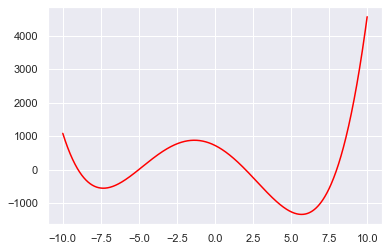

In [78]:
pl.plot(x,y)

In [79]:
# [sol.01]
k_star= np.argmin(y)
k_star, x[k_star], y[k_star]

(784, 5.68, -1338.5454182400003)

In [80]:
# [sol.02]
import sympy as sm
x= sm.symbols('x')
df_dx= f(x).diff(x)
f(x), df_dx

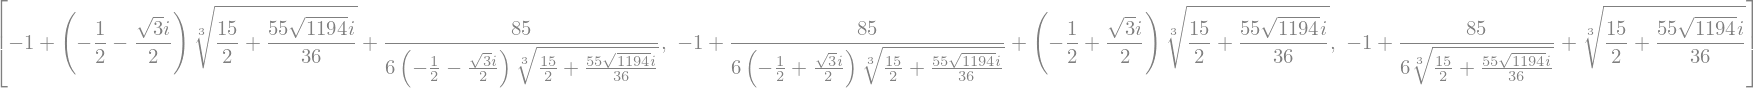

In [81]:
sol= sm.solve(df_dx, x)
sol

In [82]:
# 可以找出 3個 微分(斜率) 為 0 之處
# 解出來可能含虛數(很小)，若很小很小，當作誤差要把它戶略掉
q= [s.evalf().as_real_imag()[0] for s in sol]
q

In [83]:
# local min vs global min，要再檢查這個... 
qq= [f(s).evalf() for s in q]
qq

In [84]:
# 最後撈出其對應的 local min ，作為 global min
x_star= q[np.argmin(qq)]
x_star

In [85]:
from scipy.optimize import line_search


In [104]:
# perform a line search on a convex objective function that does not converge
from numpy import arange
from scipy.optimize import line_search
from matplotlib import pyplot
 
# objective function
def objective(x):
	#return (-5.0 + x)**2.0
    y= f(x)
    return y

 
# gradient for the objective function
def gradient(x):
	#return 2.0 * (-5.0 + x)
    s= sm.symbols('s')
    df_ds= f(s).diff(s)
    y= sm.lambdify(s, df_ds)(x)
    return y

 
# define the starting point
point = 0 #-5.0
# define the direction to move
direction = 1 #-3.0
# print the initial conditions
print('start=%.1f, direction=%.1f' % (point, direction))
# perform the line search
result = line_search(
    objective, 
    gradient, 
    point, 
    direction)
# summarize the result
#print('Alpha: %s' % result[0])
result

start=0.0, direction=1.0


In [89]:
f(s).diff(s)

In [107]:
gradient(np.array([1,2,3]))

array([-368, -462, -484])

In [108]:
objective(np.array([1,2,3]))

array([ 420,    0, -480])

In [109]:
# Wiki example

X= [(1,6), 
    (2,5), 
    (3,7), 
    (4,10)]

def y_pred(x, β1, β2):
    y= β1 + β2*x
    return y

x, β1, β2= sm.symbols('x, β1, β2')
y_pred(x, β1, β2)

In [119]:
def r(x, y, y_pred, β1, β2):
    r= y-y_pred(x,β1, β2)
    return r
X= np.array(X)
x= X[:,0]
y= X[:,1]
rr= r(x,y,y_pred, β1, β2)
rr

array([-β1 - β2 + 6, -β1 - 2*β2 + 5, -β1 - 3*β2 + 7, -β1 - 4*β2 + 10],
      dtype=object)

In [124]:
S= sum([rrr**2 for rrr in rr])
S

In [125]:
S.diff(β1)

In [126]:
S.diff(β2)

In [131]:
sol= sm.solve([S.diff(β1), S.diff(β2)], [β1, β2])
sol

In [134]:
sol.get(β1).evalf()

In [135]:
sol.get(β2).evalf()

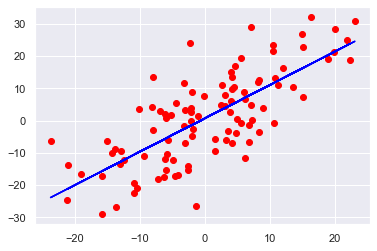

In [206]:
# Wiki example
X= [(1,6), 
    (2,5), 
    (3,7), 
    (4,10)]

# 改變 資料點的產生方式
#'''
N= 100
X= np.random.normal(1, 10, size=(N,2))
X[:,1]= 1*X[:,0] +2 + np.random.normal(0, 10, size=(N,))
#'''

def y_pred(x, β1, β2):
    y= β1 + β2*x
    return y
x, β1, β2= sm.symbols('x, β1, β2')
y_pred(x, β1, β2)
def r(x, y, y_pred, β1, β2):
    r= y-y_pred(x,β1, β2)
    return r
X= np.array(X)
x= X[:,0]
y= X[:,1]
rr= r(x,y,y_pred, β1, β2)
S= sum([rrr**2 for rrr in rr])
sol= sm.solve([S.diff(β1), 
               S.diff(β2)], 
               [β1, β2])

β1f, β2f= sol.get(β1).evalf(), sol.get(β2).evalf()

pl.scatter(x,y)
pl.plot(x,y_pred(x, β1f, β2f), 'blue')

β1f, β2f, S.subs({β1:β1f, β2:β2f})

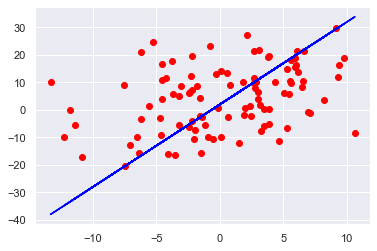

In [178]:
pl.scatter(x,y)
pl.plot(x,y_pred(x, 2, 3), 'blue')
S.subs({β1:2, β2:3})


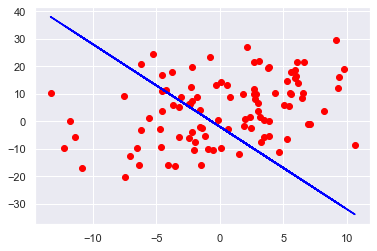

In [179]:
pl.scatter(x,y)
pl.plot(x,y_pred(x, -2, -3), 'blue')
S.subs({β1:-2, β2:-3})

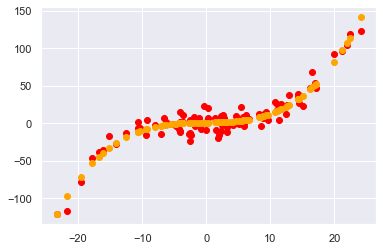

In [203]:
# Wiki example

# 延伸成 polynomial, e.g., degree=3

# 改變 資料點的產生方式
#'''
N= 100
X= np.random.normal(1, 10, size=(N,2))
X[:,1]= .01*X[:,0]**3 +2 + np.random.normal(0, 10, size=(N,))
#'''

def y_pred(x, β0, β1, β2, β3):
    y= β0 + β1*x +β2*x**2 +β3*x**3
    return y
x, β0, β1, β2, β3= sm.symbols('x, β0, β1, β2, β3')
y_pred(x, β0, β1, β2, β3)
def r(x, y, y_pred, β0, β1, β2, β3):
    r= y-y_pred(x,β0, β1, β2,β3)
    return r

X= np.array(X)
x= X[:,0]
y= X[:,1]

rr= r(x,y,y_pred, β0, β1, β2 ,β3)
S= sum([rrr**2 for rrr in rr])
sol= sm.solve([S.diff(β0), 
               S.diff(β1),
               S.diff(β2),
               S.diff(β3)], 
               [β0, β1, β2, β3])

β0f, β1f, β2f, β3f= [
    sol.get(β0).evalf(), 
    sol.get(β1).evalf(),
    sol.get(β2).evalf(), 
    sol.get(β3).evalf()
]

pl.scatter(x,y)
pl.scatter(x,y_pred(x, β0f,β1f, β2f, β3f))


β0f, β1f, β2f, β3f, S.subs({β0:β0f,β1:β1f, β2:β2f,  β3:β3f})

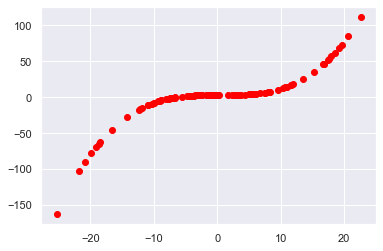

In [199]:
pl.scatter(x, y_pred(x, β0f,β1f, β2f, β3f))

β0f, β1f, β2f, β3f,